d-sandbox

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 600px">
</div>

# K-means Clustering Lab

**Objective**: *Apply K-means clustering to a dataset to learn more about how the records are related to one another.*

In this lab, you will apply what you've learned in this lesson. When complete, please use the answers to the exercises to answer questions in the following quiz within Coursera.

In [0]:
%run "../../Includes/Classroom-Setup"

Mounting course-specific datasets to /mnt/training ... Datasets are already mounted to /mnt/training from s3a://databricks-corp-training/common

Out[2]: DataFrame[]

res1: Boolean = false

res2: Boolean = false

res3: Boolean = false

## Exercise 1

In this exercise, you will create a user-level table with the following columns:

1. `avg_resting_heartrate` – the average resting heartrate
1. `avg_active_heartrate` - the average active heartrate
1. `avg_bmi` – the average BMI
1. `avg_vo2` - the average oxygen volume
1. `sum_workout_minutes` - the sum of total workout minutes
1. `sum_steps` - the sum of total steps

Fill in the blanks in the below cell to create the `adsda.ht_user_metrics_lab` table.

In [0]:
%sql
-- TODO
CREATE OR REPLACE TABLE adsda.ht_user_metrics_lab
USING DELTA LOCATION "/adsda/ht-user-metrics-lab" AS (
  SELECT avg(resting_heartrate) AS avg_resting_heartrate,
         avg(active_heartrate) AS avg_active_heartrate,
         avg(bmi) AS avg_bmi,
         avg(vo2) AS avg_vo2,
         sum(workout_minutes) AS sum_workout_minutes,
         sum(steps) AS sum_steps
  FROM adsda.ht_daily_metrics
  GROUP BY device_id
)

num_affected_rows,num_inserted_rows


**Coursera Quiz:** How many rows and columns are in `adsda.ht_user_metrics_lab`?

In [0]:
df = spark.table("adsda.ht_user_metrics_lab").toPandas()
df.shape

Out[5]: (3000, 6)

-sandbox
## Exercise 2

In this exercise, you will split your data into an training set and an inference set.

Fill in the blanks below to split the data.

<img alt="Side Note" title="Side Note" style="vertical-align: text-bottom; position: relative; height:1.75em; top:0.05em; transform:rotate(15deg)" src="https://files.training.databricks.com/static/images/icon-note.webp"/> In practice, you should use as much data as possible for your training set. An inference set will usually become available after the training process, rather than being split apart from your training set prior to the training of the model.

In [0]:
# TODO
from sklearn.model_selection import train_test_split

train_df, inference_df = train_test_split(df, train_size=0.85, test_size=0.15, random_state=42)

**Coursera Quiz:** How many rows are in the training set and the inference set?

In [0]:
print(f"{train_df.shape[0]} and {inference_df.shape[0]}")

2550 and 450

## Exercise 3

In this this exercise, you will identify the optimal number of clusters for K-means using the training set.

When completing this exercise:

* Assess values of *K* from 2-16
* Set the maximum number of iterations to 500
* Use a random state of 1234

Fill in the blanks below to compute the distortion for each value of *K*.

In [0]:
# TODO
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

distortions = []
values_of_k = range(2, 16)

for k in values_of_k:
  k_means = KMeans(n_clusters=k, max_iter=500, random_state=1234)
  k_means.fit(scale(train_df))
  distortion = k_means.score(scale(train_df))
  distortions.append(-distortion)

**Coursera Quiz:** Which of the values of *K* has the lowest level of distortion?

In [0]:
list(zip(distortions, values_of_k))

Out[9]: [(7768.960967124799, 2),
 (5745.058370997906, 3),
 (4443.622448518033, 4),
 (3730.5515604383236, 5),
 (3292.7398460559907, 6),
 (2976.307305056781, 7),
 (2681.8614548620285, 8),
 (2455.410779134733, 9),
 (2242.312666210896, 10),
 (2067.8327505502702, 11),
 (1946.5016715687477, 12),
 (1815.8900122450086, 13),
 (1711.8710523722068, 14),
 (1626.02463076023, 15)]

**Coursera Quiz:** According to the elbow method, which of the values of *K* is the optimal number of clusters?

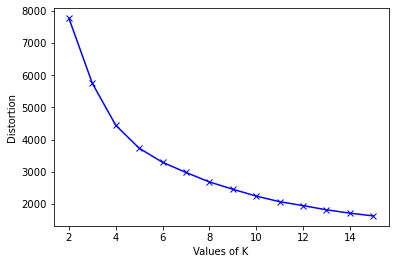

In [0]:
import matplotlib.pyplot as plt

plt.plot(values_of_k, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.show()

## Exercise 4

In this exercise, you will retrain the model with the optimal number of clusters.

Fill in the blanks below to retrain the model.

In [0]:
# TODO
k_means = KMeans(n_clusters=4, max_iter=500, random_state=1234)
k_means.fit(scale(df))

Out[35]: KMeans(max_iter=500, n_clusters=4, random_state=1234)

**Coursera Quiz**: Which of the following datasets should be used when retraining the model with the optimal number of clusters? Select one.

* The training set
* The inference set
* The full set
* Data that is not yet available

## Exercise 5

In this exercise, you will examine the centroids for the clusters.

Fill in the blanks below to examine the centroids.

In [0]:
# TODO
k_means.cluster_centers_

Out[36]: array([[-0.02245687, 0.19365494, 0.9740383 , -0.11073997, 0.02605338,
 -0.22839975],
 [-0.81923734, -0.83077457, -0.66176567, 0.83083923, 0.40984981,
 0.86461281],
 [ 1.35508137, 1.42817863, 0.16555631, -1.23550641, -2.3958044 ,
 -1.68969043],
 [ 1.49476148, 1.08129433, -0.00757879, -1.36150355, 0.35920083,
 -0.94157663]])

**Coursera Quiz**: In how many dimensions is each centroid?

* 2
* 4
* 6
* 16

## Exercise 6

In this exercise, you will perform inference by placing new rows from the inference set into the existing clusters.

Fill in the blanks below to assign rows from the inference set into new clusters.

In [0]:
# TODO
inference_df_clusters = k_means.predict(scale(inference_df))
clusters_df = inference_df.copy()
clusters_df["cluster"] = inference_df_clusters

**Coursera Quiz**: Which of the clusters has the most rows from the inference set assigned to it?

In [0]:
clusters_df["cluster"].value_counts()

Out[40]: 1 202
3 131
2 72
0 45
Name: cluster, dtype: int64

**Coursera Quiz**: Which of the clusters has the rows that take the greatest number of average total steps?

In [0]:
clusters_df.groupby(["cluster"])[["sum_steps"]].mean()

Out[41]:

,sum_steps
cluster,
0,1.886940e+06
1,4.715815e+06
2,2.689375e+06
3,3.484236e+06


Congrats! That concludes our lesson on K-means clustering!

Be sure to submit your quiz answers to Coursera, and join us in the next lesson to learn about principal components analysis.

-sandbox
&copy; 2020 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="http://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="http://help.databricks.com/">Support</a>